## Importing and Loading Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('bangaluru_house_price.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
to_drop = ['area_type','society','balcony','availability']
df2= df.drop(to_drop,axis=1)

In [9]:
df2.head(),df2.shape

(                   location       size total_sqft  bath   price
 0  Electronic City Phase II      2 BHK       1056   2.0   39.07
 1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
 2               Uttarahalli      3 BHK       1440   2.0   62.00
 3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
 4                  Kothanur      2 BHK       1200   2.0   51.00,
 (13320, 5))

## Data Cleaning

In [10]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df3 = df2.dropna()

In [18]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
df3.shape,df2.shape

((13246, 5), (13320, 5))

In [22]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [29]:
len(df3['size'].unique())

31

In [32]:
from warnings import filterwarnings
filterwarnings("ignore")

In [33]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [31]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [34]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [35]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [36]:
df3.bhk.describe()

count    13246.000000
mean         2.801902
std          1.295758
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [38]:
df3[df3.bhk > 15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [40]:
df3.total_sqft.unique(),len(df3.total_sqft.unique())

(array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
       dtype=object),
 2067)

In [41]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [43]:
df3[~df3['total_sqft'].apply(is_float)] # those cant be changed to float

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


Since the values are in range create a function that will take the mean of the range

In [44]:
def sqft_to_num(x):
    tokens = x.split(' - ')
    if len(tokens) == 2 :
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [45]:
sqft_to_num('1122 - 1284')

1203.0

In [46]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [47]:
df4 = df3.copy()

In [48]:
df4['total_sqft'] = df4['total_sqft'].apply(sqft_to_num)

In [49]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [50]:
df4.shape

(13246, 6)

In [51]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## More Data Cleaning

## Feature Engineering

### Feature Engineering

In [52]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [53]:
df5 = df4.copy()

In [54]:
df5['price_per_sqft']=df['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [57]:
location_stats = df5.location.value_counts()

(array([6505., 2496., 1429.,  886.,  639.,  391.,  313.,  251.,  187.,
         149.]),
 array([   0. ,  130.3,  260.6,  390.9,  521.2,  651.5,  781.8,  912.1,
        1042.4, 1172.7, 1303. ]),
 <BarContainer object of 10 artists>)

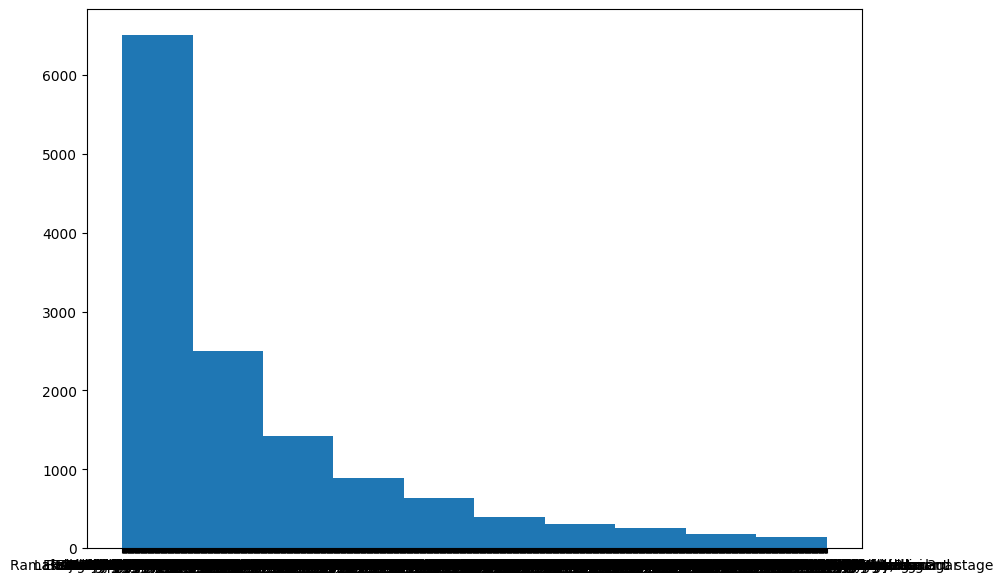

In [56]:
fig = plt.figure(figsize=(10,7))
plt.hist(df5.location)

In [58]:
type(location_stats)

pandas.core.series.Series

In [59]:
location_stats[:10]

Whitefield               534
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           266
Thanisandra              233
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [62]:
len(location_stats[location_stats <=10])

1063

In [65]:
location_stats_less_than_10 = location_stats[location_stats <=10]

In [64]:
len(df5.location.unique())

1304

In [66]:
df5.location = df5.location.apply(lambda x: "Other" if x in location_stats_less_than_10 else x)

In [69]:
df5.location.head(10)

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                       Other
Name: location, dtype: object

## Outliear Detection and Removal